# 0-Channel Images for DL: Matplotlib vs CV2 vs Keras

Working with images and transfer Deep Learning, I had problems with grayscale single or zero channel images such as MRI sections (Alzheimer scans). Therefore, I explained the differences of loading and preprocessing an image of single channel for the use with pretrained models.

An image could be loaded using different tools such as Matplotlib, CV2 or Keras. We will use the following 3 images from "images" folder:

| colour3c.png  | grayscale3c.jpg | grayscale1c.png |
| ------------- | --------------- | --------------- |
| colour 3 channels | greyscale 3 channels | greyscale 1 channel |
| ![](images\colour3c.png)| ![](images\grayscale3c.jpg) | ![](images\grayscale1c.png) |
    

Let's import the python module and list with variables:

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing import image

import numpy as np
# plots in jupyter notebooks
%matplotlib inline

# images to test
image_3c = ".\\images\\colour3c.png"; image_3g = ".\\images\\grayscale3c.jpg"; image_1g = ".\\images\\grayscale1c.png"

# List of images
imageList  = [image_1g, image_3c, image_3g]
# List of python modules for image loading
moduleList = ["plt", "cv2", "keras"]

c:\program files\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Let's understand the problem with single channel image: image_1g. If we load this image with any module we will have a shape of 2 dimension only (no-channel!).

Original photo: ![Grayscale Image](images\grayscale1c.png)

First, we try the **cv2** module for loading images:

In [2]:
# Load image with cv2
zeroCh_image = cv.imread(image_1g, -1)
print('Image shape:', zeroCh_image.shape, ' | Pixel value type:', zeroCh_image.dtype)

Image shape: (256, 256)  | Pixel value type: uint8


The majority of pretrained CNN models or CNN algoritms are expected 3 channel images. Therefore, errors or strange results could results by using this loading without extra image procesing: creating 3 channels, normalize the image, etc.

Let's try to show this image with plt:

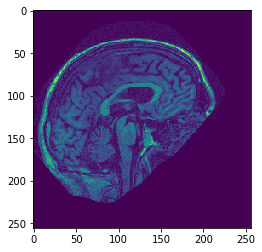

In [3]:
plt.imshow(zeroCh_image)

We can observe colour even if the image is grayscale. Therefore, we need to maintain grayscale using cvtColor function. The image will be transformed from 0-channels to 3-channels:

New shape: (256, 256, 3)


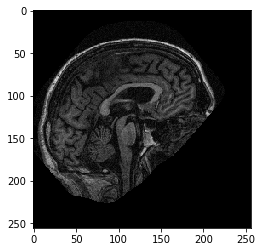

In [4]:
new_image = cv.cvtColor(zeroCh_image, cv.COLOR_GRAY2RGB)
print("New shape:", new_image.shape)
plt.imshow(new_image)

**Conclusion**: with only one function, we are able to maintain the grayscale and to have 3 channels:

*new_image = cv2.cvtColor(zeroCh_image, cv2.COLOR_GRAY2RGB)*.

Let's check the **Keras** image loading. Loading an image in keras is resulting into an image object, not a directly array with pixel values (an error will raise!). Therefore, the is no shape for it. You should observe that we use no other arguments for *load_img()*. There is a parameter *grayscale* with *False* as default parameter. As we expected, if you forget this parameter, the loading function in keras will interpret and modify the pixels values!

In [5]:
img_keras = image.load_img(image_1g)

# if will try to print the shape an error be display
# print('Loaded image shape in keras:', img_keras.shape)

But you can visualize the image in the same way you did it with other modules:

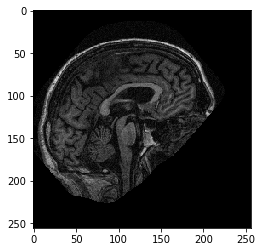

In [6]:
plt.imshow(img_keras)

Thus, in Keras, normally you convert this image object to the correspondent array with **3 channels** (256, 256, 3):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Extracted array shape: (256, 256, 3)


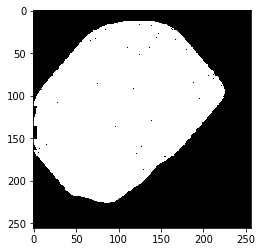

In [7]:
img_keras_arr = image.img_to_array(img_keras)
print("Extracted array shape:", img_keras_arr.shape)
plt.imshow(img_keras_arr)

We don't like this image. It sghould a a brain scan. So, we can use pixels normalization. We keep the same number of channels (256, 256, 3):

Shape after pixel normalization: (256, 256, 3)


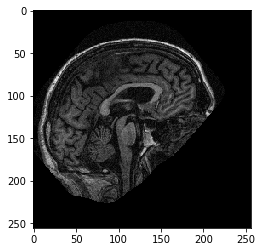

In [8]:
img_keras_arr = cv.normalize(img_keras_arr, img_keras_arr, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
print("Shape after pixel normalization:", img_keras_arr.shape)
plt.imshow(img_keras_arr)

#### Grayscale parameter

If we add the parameter *grayscale=True*, the output will have only 1 channel (256, 256, 1). So, we need extra processing to add 3 channels and after that to normalize. 

In [9]:
# load image as object
img_keras2 = image.load_img(image_1g, grayscale=True)
# convert image object to array
img_keras_arr2 = image.img_to_array(img_keras2)
print("Extracted array shape using grayscale = true:", img_keras_arr2.shape)

Extracted array shape using grayscale = true: (256, 256, 1)


Thus, we need to transform this array to become similar with the other python modules. We use cv.COLOR_GRAY2RGB to obtain 3 channel image and cv.normalize to normalize the pixel values:

Corrected image shape: (256, 256, 3)


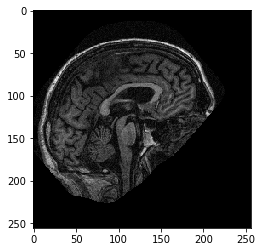

In [10]:
# convert to RGB structure ==> create 3 channels!
img_keras_arr2 = cv.cvtColor(img_keras_arr2, cv.COLOR_GRAY2RGB)
print("Corrected image shape:", img_keras_arr2.shape)
# normalize pixels
img_keras_arr2 = cv.normalize(img_keras_arr2, img_keras_arr2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
plt.imshow(img_keras_arr2)

**Conclusion for keras**: Depending on the parameter *grayscale=True*, with 0-channel images in Keras, different output arrays will be obtained. The visualization will depend on this difference too.

### Different solutions for 0-channels to 3-channels conversion

An other solution is just to stack the 0-channel image in 3 channels using numpy. Let's load the 0-channel image with cv2 to obtain directly an array:

Stacked image shape: (256, 256, 3)


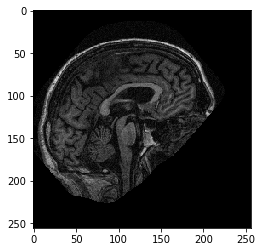

In [11]:
stacked_img = np.stack((cv.imread(image_1g, -1),)*3, -1)
print("Stacked image shape:", stacked_img.shape)
plt.imshow(stacked_img)

Thus, we could avoid keras problems with visualizing a zero-channel image.

As we expected, the pixel differences between the staked image and the COLOR_GRAY2RGB version is null:

In [12]:
COLOR_GRAY2RGB_image = cv.cvtColor(cv.imread(image_1g, -1), cv.COLOR_GRAY2RGB)
print("Pixels difference:", np.sum(stacked_img - COLOR_GRAY2RGB_image))

Pixels difference: 0


## Error found on the net

I was searching for a solution with the zero channel images and I found some bad explanations.

#### Bad resize with numpy

One proposal solution was the use of np.resize. Let's see the output for this transformation if we use the zero channel image:

New shape with resize: (256, 256, 3)


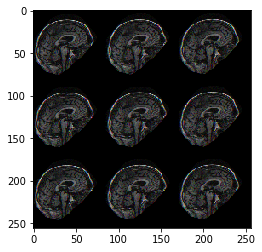

In [13]:
new_img2 = np.resize(cv.imread(image_1g, -1), (256, 256, 3))
print("New shape with resize:", new_img2.shape)
plt.imshow(new_img2)

### Summary function

At the end of these explanations, let's create a function what can load an image with any of these modules and correct the pixel values (it will return the pixel array). Depending on the module and the number of channels of the image, different processing will be applied:

In [14]:
# Load image using a specific python module and correct the pixel values
def load_image_byModules(myimage, module):
    # myimage = path to file including file name
    # module = "plt", "cv2", "keras"
    # returns the pixels of an image as 3D array
    if module == "plt":
        img = plt.imread(myimage) # read image as array
    if module == "cv2":
        img = cv.imread(myimage)                 # read image as array
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # convert BGR to RGB because cv is reading default BGR!
    if module == "keras":
        img = image.load_img(myimage) # object
        img = image.img_to_array(img)  # array
        
    # change 1 channel to 3 channels images
    if len(img.shape)!=3 or (len(img.shape)==3 and img.shape[len(img.shape)-1]==1):
        # change number of channest 1 to 3
        img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
    
    # normalize pixels, convert uint8 to float32
    img = cv.normalize(img, img, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F) 
    return img

Do not forget that imread() from cv is reading default BGR, not RGB! 

Let's show the images loaded by modules, the shape and the dtype of the loaded data:

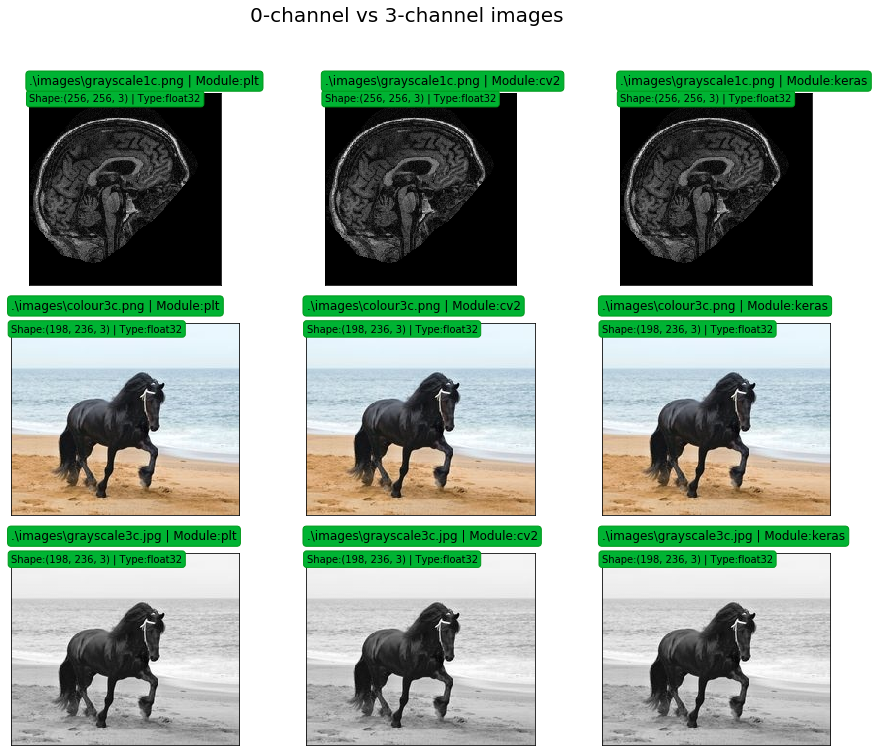

In [15]:
# Create the subplots for each combination image - module
fig, ax = plt.subplots(3, 3, frameon=False, figsize=(15, 12))
fig.suptitle('0-channel vs 3-channel images', fontsize=20)
plt.setp(ax, xticks=[], yticks=[]) # remove x,y ticks
for i in range(len(imageList)):
    for j in range(len(moduleList)):
        # loading an image with a specific module
        img = load_image_byModules(imageList[i], moduleList[j])
        # show the image
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        # print labels with info
        ax[i][j].text(0, 0, str("Shape:")+str(img.shape)+str(" | Type:")+str(img.dtype), size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
        ax[i][j].text(0, -25, str(imageList[i])+str(" | Module:")+str(moduleList[j]), size=12, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))

**Always check the content of your image arrays and understand the visualization functions for images!**

Enjoy DL!
@muntisa